In [645]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import matplotlib.patches
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

from itertools import combinations
from math import pi, cos, sin

%matplotlib inline

In [536]:
def create_triangle(xy, theta, r=0.1, color='b'):
    theta = theta - pi/2
    tri = matplotlib.patches.RegularPolygon(
        xy=xy, 
        numVertices=3, 
        radius=r, 
        orientation=theta,
        color=color,
    )
    return tri

In [542]:
def side_of_line(pa, pb, p):
    '''Returns -1 if p is in left half-plane determined 
       by points pa and pb, +1 if in right half-plane'''
    
    lhs = (p[1] - pa[1]) * (pb[0] - pa[0])
    rhs = (pb[1] - pa[1]) * (p[0] - pa[0])
    return np.sign(rhs - lhs)

In [543]:
def exists_separating_hyperplane(tri1, tri2):
    '''tri1 and tri2 are 2 x 3 and denote the vertices of two triangles'''
    
    for i in range(3):
        pa, pb = [tri1[:, j] for j in range(3) if i != j]
        side_1 = side_of_line(pa, pb, tri1[:, i])
        sides_2 = [side_of_line(pa, pb, tri2[:, j]) for j in range(3)]
        signs_differ = [side_1 != side_2 for side_2 in sides_2]
        if all(signs_differ): return True
    return False

In [544]:
def intersect(tri1, tri2):
    '''Two triangles intersect if cannot find separating hyperplane'''
    b1 = exists_separating_hyperplane(tri1, tri2)
    b2 = exists_separating_hyperplane(tri2, tri1)
    return (not b1) and (not b2)

In [598]:
def triangulate(patch):
    '''Decomposes a polygonal patch into triangles.
       Does not account for redundant edges even
       though it really should.'''
    x, y = patch.get_verts().T[:, :-1]
    numvertices = x.shape[0]
    combs = map(list, combinations(range(numvertices), 3))
    tris = [np.array([x[comb], y[comb]]) for comb in combs]
    return tris

In [599]:
def collision_check(piano, obstacles, verts_fn, inflate_factor=1.0):
    piano = inflate_factor * verts_fn(piano)[:3].T
    obstacles = [verts_fn(obs)[:3].T for obs in obstacles]
    return any([intersect(piano, obs) for obs in obstacles])

In [600]:
def move_piano(piano, xy, theta):
    piano.xy = xy
    piano.orientation = theta

In [628]:
def compute_configuration_space(piano, obstacles, verts_fn, n_xy=20, n_theta=10):
    '''Sweeps through grid checking for triangle intersections'''
    
    linspace_xy = np.linspace(0, 6, n_xy)
    linspace_theta = np.linspace(0, 2 * pi, n_theta)
    cspace = np.zeros((n_xy, n_xy, n_theta))
    
    for i, x in enumerate(linspace_xy):
        for j, y in enumerate(linspace_xy):
            for k, theta in enumerate(linspace_theta):
                move_piano(piano, (x, y), theta)
                cspace[i, j, k] = collision_check(piano, obstacles, verts_fn)
    return cspace

In [510]:
def make_fancy_piano(offset):
    '''Hardcoded polygon to look more like piano'''
    vertices = np.array([
        [0.0, 0.0], [0.0, 2.0], [0.5, 2.2], 
        [1.0, 2.0], [1.2, 1.2], [1.5, 1.0], [1.5, 0.0]])
    xy = vertices + offset
    piano = matplotlib.patches.Polygon(xy=xy)
    return piano

In [625]:
def make_obstacles():
    XY = [(2, 1), (2, 5), (3, 2)]
    Theta = [(pi/2), (-pi/2), (pi/2)]
    params = zip(XY, Theta)
    return [create_triangle(*p, r=0.5, color='black') for p in params]

In [515]:
def plot_world(patches):
    fig, ax = plt.subplots()
    for patch in patches:
        ax.add_patch(patch)
        
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    plt.show()
    return ax

In [595]:
def demo_triangle_intersection(positive_case=True):
    tri1 = np.array([[3, 1, 4], [3, 4, 1]])
    if positive_case: tri2 = np.array([[2, 1, 4], [0, 1, 2]])
    else: tri2 = np.array([[0, 0, 2], [0, 1, 2]])
        
    verb = 'do' if intersect(tri1, tri2) else 'do not'
    title = 'triangles {} intersect'.format(verb)

    fig, ax = plt.subplots()
    for tri in (tri1, tri2):
        ax.add_patch(matplotlib.patches.Polygon(xy=tri.T))
        
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    fig.suptitle(title)

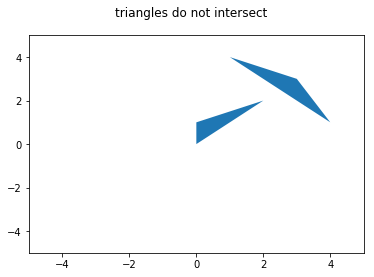

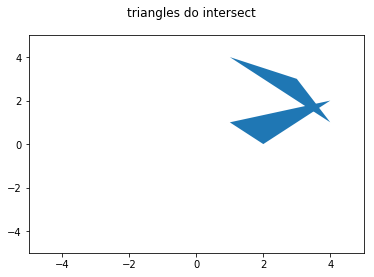

In [596]:
demo_triangle_intersection(positive_case=False)
demo_triangle_intersection(positive_case=True)

In [505]:
def get_verts(ax, patch):
    transformation = ax.transData.inverted()
    return transformation.transform(patch.get_verts())

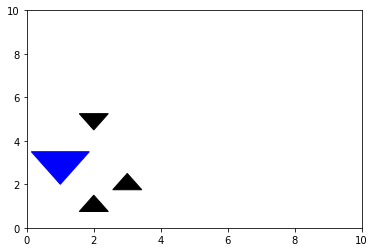

False

In [626]:
piano = create_triangle(xy=(1, 3), theta=pi/6, r=1)
obstacles = make_obstacles()

patches = [piano] + obstacles
ax = plot_world(patches)

verts_fn = lambda patch: get_verts(ax, patch)
collision_check(piano, obstacles, verts_fn)

In [629]:
cspace = compute_configuration_space(piano, obstacles, verts_fn)

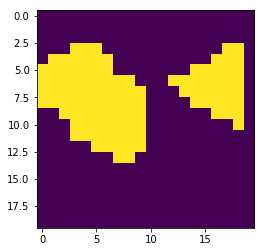

In [630]:
plt.imshow(cspace[:, :, 3])
plt.show()

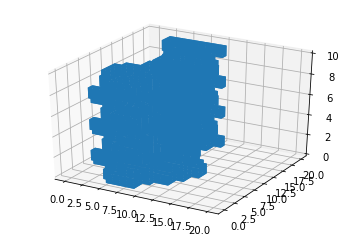

In [646]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(cspace)
plt.show()

In [647]:
def rotate(angle):
    ax.view_init(azim=angle)
    
rot_animation = FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)
rot_animation.save('rotation.gif', dpi=80, writer='imagemagick')

In [99]:
def main():
    pass

In [ ]:
if __name__ == '__main__':
    main()